# EDA of Haberman Dataset

In [1]:
import warnings 
warnings.filterwarnings("ignore") 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data  = pd.read_csv(r"C:\Users\anshi\Downloads\haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
data.shape

(306, 4)

In [3]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical)  --> A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
4. Survival status (class attribute) 
          -- 1 = the patient survived 5 years or longer 
          -- 2 = the patient died within 5 year

In [4]:
data.dtypes #All numerical values, further all numerical values are discrete. 

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [5]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


data.describe() tells us that
1. Age range of patients 30-83 years
2. 50% of patients have less than 2 positive auxillary node, 75% of patients have less than 5 positive auxillary node. 

In [6]:
data.age.unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [7]:
len(data.isnull()) #means there are no null values. 

306

In [8]:
len(data.duplicated()) #Means no duplicate entry found. 

306

# Histogram for:
## 1. Age
## 2. Year
## 3. Nodes

Text(0.5, 1.0, 'Age Vs Frequency')

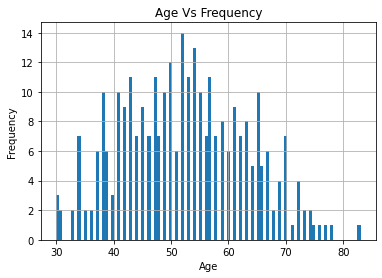

In [9]:
data.age.hist(bins=100)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Vs Frequency")
#bins in histogram mean the division of value points into equal parts

Age vs Frequency Histograms helps us understand that approximately 75% of the patients are aged > 40 years. 

Text(0.5, 1.0, 'Year of Operations vs count of operations performed')

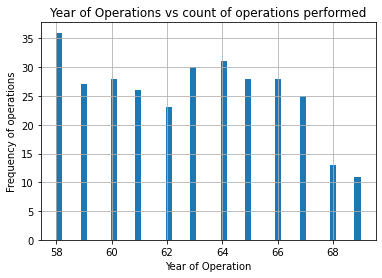

In [10]:
data.year.hist(bins=50)
plt.xlabel("Year of Operation")
plt.ylabel("Frequency of operations")
plt.title("Year of Operations vs count of operations performed")

Above histogram between year of operation and the count of operations helps us understand that most of the operations were performed in the year 1958 followed by a gradual decrease till 1963-1964 which saw an increment in the number of operations performed, ultimately followed by a gradual decrease.

Text(0.5, 1.0, '')

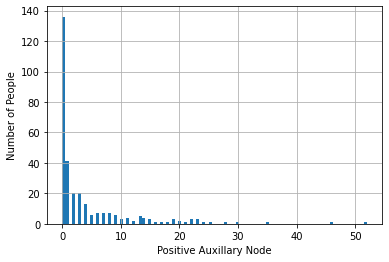

In [11]:
data.nodes.hist(bins=100)
plt.xlabel("Positive Auxillary Node")
plt.ylabel("Number of People")
plt.title("")

Above histogram between positive auxillary nodes vs count of people shows that almost 140 out of 306 people had no lymph nodes found which accounts to almost 45% of the people.

Text(0.5, 1.0, 'Status vs Count')

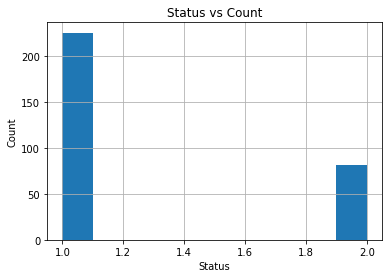

In [12]:
data.status.hist(bins=10)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status vs Count")

Above histogram between status of the people and count helps us draw an insight that more than 200 people lived for more than 5 years after the operation. 

In [13]:
data.status.value_counts(1)

1    0.735294
2    0.264706
Name: status, dtype: float64

by data.status.value_counts(1) we can draw an insight that upto 73% of people survived 5 or more than 5 years while 26% of people couldn't survive more than 5 years. 

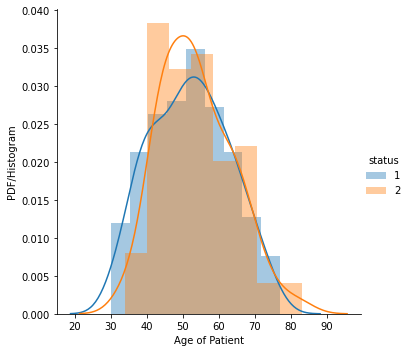

In [14]:
sns.FacetGrid(data, hue='status', height=5)\
    .map(sns.distplot,'age')\
    .add_legend()
plt.ylabel("PDF/Histogram")
plt.xlabel("Age of Patient")
plt.show()

Among the people who survived less than 5 years after the operation, age range 40-50 was most prone. 

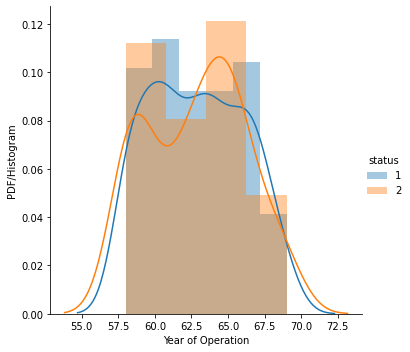

In [15]:
sns.FacetGrid(data, hue='status', height=5)\
    .map(sns.distplot,'year')\
    .add_legend()
plt.ylabel("PDF/Histogram")
plt.xlabel("Year of Operation")
plt.show()

From the above graph, we can conclude that operations performed in 1960 till 1962 had the highest rate of people having more than 5 years after the operations, while operations performed in year 1963 to 1966 had the highest rate of people having less than 5 years after the operation. 

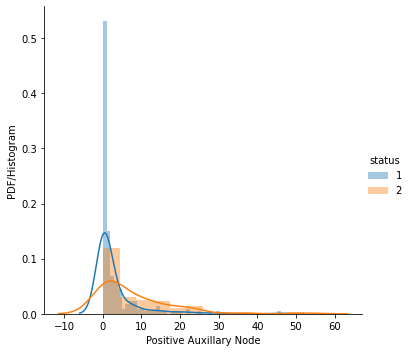

In [16]:
sns.FacetGrid(data, hue='status', height=5)\
    .map(sns.distplot,'nodes')\
    .add_legend()
plt.ylabel("PDF/Histogram")
plt.xlabel("Positive Auxillary Node")
plt.show()

Above graph tells us that most of the people who survived for more than 5 years after the operation had zero positive auxillary nodes.  
The survival rate dropped with increasing number of positive auxillary nodes. 

<AxesSubplot:xlabel='status', ylabel='age'>

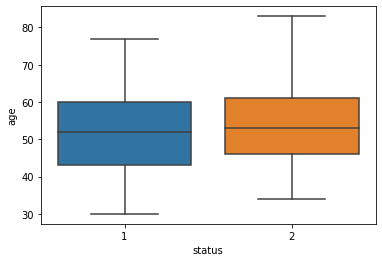

In [17]:
sns.boxplot(x='status',y='age',data=data)

The median age of people survivng less than 5 years after the operation is around 52 with most of the people having age range of 45-60 years. 

<AxesSubplot:xlabel='status', ylabel='year'>

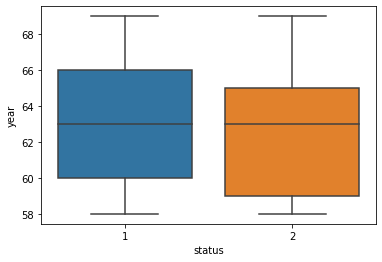

In [18]:
sns.boxplot(x='status',y='year',data=data)

All the operations performed before the year 1960 resulted in people with a status of 2. 

<AxesSubplot:xlabel='status', ylabel='nodes'>

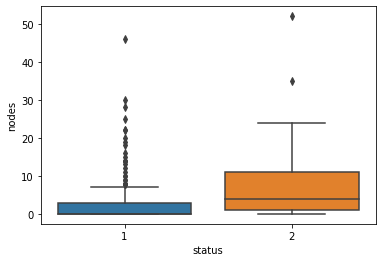

In [19]:
sns.boxplot(x='status',y='nodes',data=data)

Note to self: Although, in the nodes and status boxplot you are seeing various points outside the whiskers, these are NOT outliers. 

<AxesSubplot:xlabel='status', ylabel='age'>

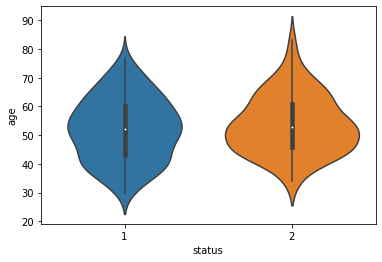

In [20]:
sns.violinplot(x='status',y='age',data=data)

As per the graph above, people in the age range of 45-55 had a comparitively high chance of surving less than 5 
years after the operation. 

<AxesSubplot:xlabel='status', ylabel='year'>

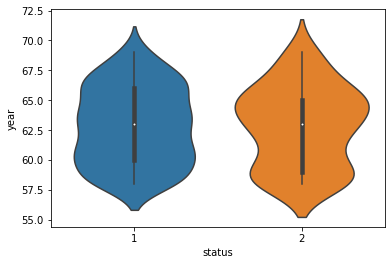

In [21]:
sns.violinplot(x='status',y='year',data=data)

Operations performed after 1958 saw a gradual decrease people falling under status 2 category until almost 1963 when it increased till 1965 then decreased after that. 

Note to self: Nodes is an important feature. 

<AxesSubplot:xlabel='status', ylabel='nodes'>

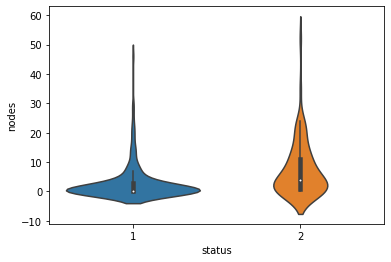

In [22]:
sns.violinplot(x='status',y='nodes',data=data)

As per the violin plot between nodes and status, most people with more than 10 nodes couldn't survive more than 5 years. 

### Conclusions: 
1. Almost 73% of people survived more than 5 years after the operation. 
2. People with lower number of positive auxillary nodes have a better chance of surviving more than 5 years after the operation. 
3. Maximum number of patients lie between age range of 40-60 years. 
4. All the histographs are overlapping hence it is not easy to find out one best attribute for the classification.